# LETS GROW MORE DATA SCIENCE INTERN MARCH 2023

# Beginner Level Task: 


## Task 1: Iris Flower Classification ML Project

**This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.**


**The iris dataset contains three classes of flowers, Versicolor, Setosa, Virginica, and each class contains 4 features, ‘Sepal length’, ‘Sepal width’, ‘Petal length’, ‘Petal width’. The aim of the iris flower classification is to predict flowers based on their specific features.**

**Dataset Link:** http://archive.ics.uci.edu/ml/machine-learning-databases/iris



### First I import all the required python libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix


In [2]:
columns = ['Sepal_length','Sepal_width','Petal_length','Petal_width','Species_labels']
iris_data = pd.read_csv('iris.csv',names=columns)

### Then analyse the dataset

In [3]:
iris_data.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species_labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_data.tail()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species_labels
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
iris_data.shape

(150, 5)

In [6]:
iris_data.isnull().sum()

Sepal_length      0
Sepal_width       0
Petal_length      0
Petal_width       0
Species_labels    0
dtype: int64

In [7]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sepal_length    150 non-null    float64
 1   Sepal_width     150 non-null    float64
 2   Petal_length    150 non-null    float64
 3   Petal_width     150 non-null    float64
 4   Species_labels  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris_data.describe()

,Sepal_length,Sepal_width,Petal_length,Petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
iris_data.groupby('Species_labels').describe()

Sepal_length                                              \
                       count   mean       std  min    25%  50%  75%  max   
Species_labels                                                             
Iris-setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                Sepal_width         ... Petal_length      Petal_width         \
                      count   mean  ...          75%  max       count   mean   
Species_labels                      ...                                        
Iris-setosa            50.0  3.418  ...        1.575  1.9        50.0  0.244   
Iris-versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
Iris-virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                                    
                      std  min  25%  50%  75%  max  
Species_labels                                      
Iris-setosa      0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [10]:
iris_data.Species_labels.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species_labels, dtype: int64

### Then Performed Data Visualization

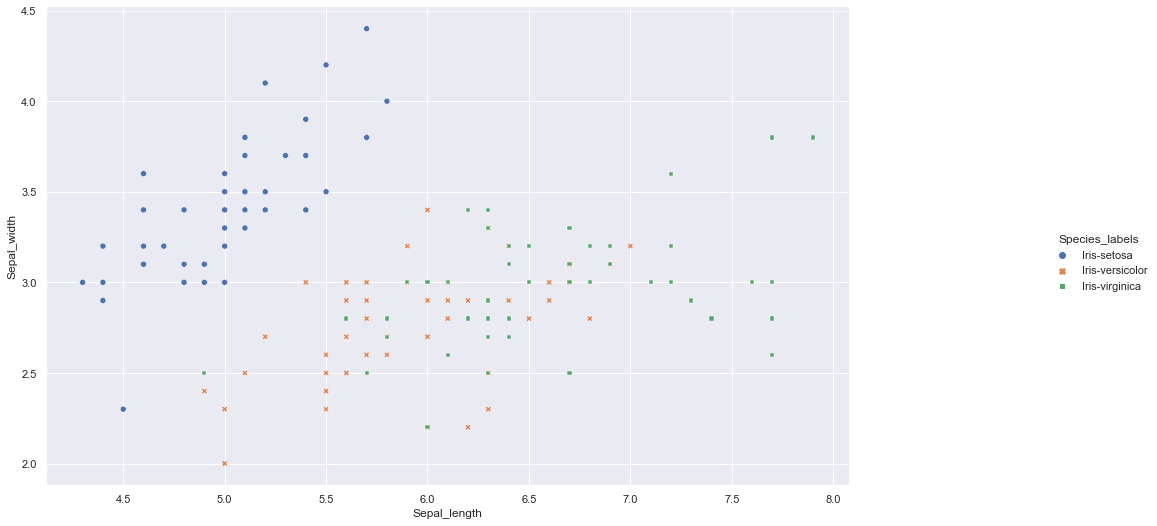

In [11]:
g=sns.relplot(x='Sepal_length',y='Sepal_width', data=iris_data,hue='Species_labels',style='Species_labels')
g.fig.set_size_inches(18,8)
plt.show()

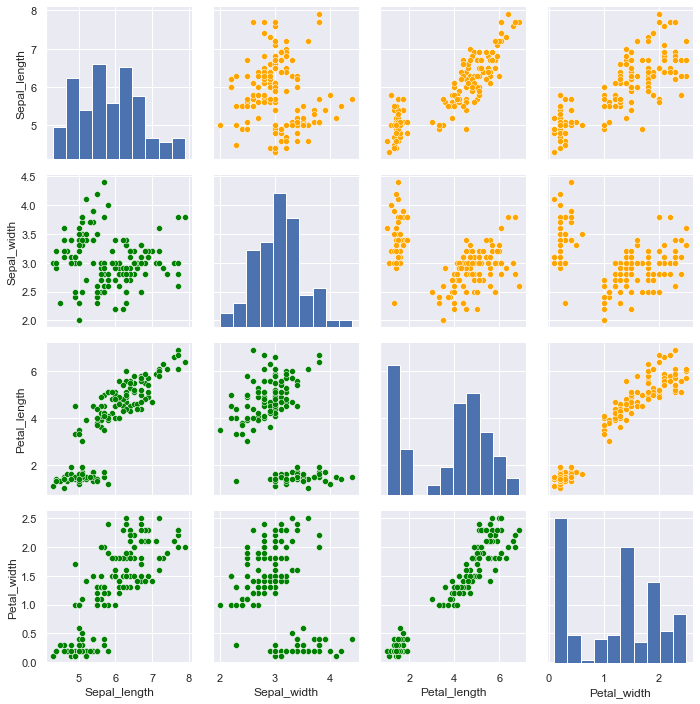

In [12]:
g = sns.PairGrid(iris_data)
g.map_upper(sns.scatterplot,color='Orange')
g.map_lower(sns.scatterplot, color='green')
g.map_diag(plt.hist)

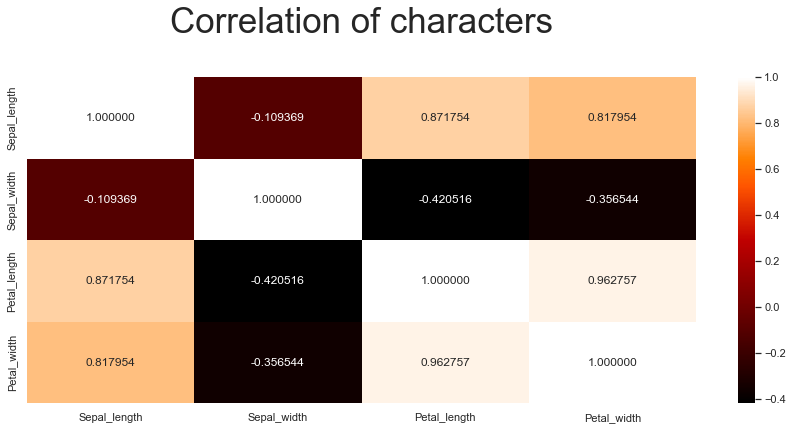

In [13]:
plt.figure(figsize=(15,6))
sns.heatmap(iris_data.corr(),annot=True,fmt='f',cmap='gist_heat').set_title('Correlation of characters\n',size=35)
plt.show()

### Model Preparation

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
iris_data['Species_labels'] = le.fit_transform = (iris_data['Species_labels'])
iris_data.head(10)

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species_labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [16]:
x = iris_data.drop(columns=['Species_labels'])
y = iris_data.Species_labels

### Spliting Dataset

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=1/3, random_state=5)

# 1. Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0)
log.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [19]:
y_pred_train = log.predict(x_train)
y_pred_test=log.predict(x_test)
print(confusion_matrix(y_test,y_pred_test))

[[16  0  0]
 [ 0 16  1]
 [ 0  0 17]]


In [20]:
print(classification_report(y_test,y_pred_test))
print("Training Accuracy :", accuracy_score(y_train, y_pred_train))
print("Test Accuracy :", accuracy_score(y_test, y_pred_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        17
 Iris-virginica       0.94      1.00      0.97        17

       accuracy                           0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50

Training Accuracy : 0.98
Test Accuracy : 0.98


# 2. Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=10)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=10)

In [22]:
rf_pred_train = rf.predict(x_train)
rf_pred_test = rf.predict(x_test)
print(confusion_matrix(y_test,rf_pred_test))

[[16  0  0]
 [ 0 16  1]
 [ 0  2 15]]


In [23]:
print(classification_report(y_test,rf_pred_test))
print("Training Accuracy :", accuracy_score(y_train, rf_pred_train))
print("Test Accuracy :", accuracy_score(y_test, rf_pred_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.89      0.94      0.91        17
 Iris-virginica       0.94      0.88      0.91        17

       accuracy                           0.94        50
      macro avg       0.94      0.94      0.94        50
   weighted avg       0.94      0.94      0.94        50

Training Accuracy : 1.0
Test Accuracy : 0.94


# 3. KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
knn_pred_train = knn.predict(x_train)
knn_pred_test = knn.predict(x_test)
print(confusion_matrix(y_test,knn_pred_test))

[[16  0  0]
 [ 0 15  2]
 [ 0  0 17]]


In [26]:
print(classification_report(y_test,knn_pred_test))
print("Training Accuracy :", accuracy_score(y_train, knn_pred_train))
print("Test Accuracy :", accuracy_score(y_test, knn_pred_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.88      0.94        17
 Iris-virginica       0.89      1.00      0.94        17

       accuracy                           0.96        50
      macro avg       0.96      0.96      0.96        50
   weighted avg       0.96      0.96      0.96        50

Training Accuracy : 0.97
Test Accuracy : 0.96


# 4. Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1, max_depth=6)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=1)

In [28]:
dt_pred_train = dt.predict(x_train)
dt_pred_test = dt.predict(x_test)
print(confusion_matrix(y_test,dt_pred_test))

[[16  0  0]
 [ 0 15  2]
 [ 0  1 16]]


In [29]:
print(classification_report(y_test,dt_pred_test))
print("Training Accuracy :", accuracy_score(y_train, dt_pred_train))
print("Test Accuracy :", accuracy_score(y_test, dt_pred_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.94      0.88      0.91        17
 Iris-virginica       0.89      0.94      0.91        17

       accuracy                           0.94        50
      macro avg       0.94      0.94      0.94        50
   weighted avg       0.94      0.94      0.94        50

Training Accuracy : 1.0
Test Accuracy : 0.94


# 5. Linear SVC

In [30]:
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss.fit(x_train,y_train)

GaussianNB()

In [31]:

gs_pred_train = gauss.predict(x_train)
gs_pred_test = gauss.predict(x_test)
print(confusion_matrix(y_test,gs_pred_test))


[[16  0  0]
 [ 0 16  1]
 [ 0  2 15]]


In [32]:
print(classification_report(y_test,gs_pred_test))
print("Training Accuracy :", accuracy_score(y_train, gs_pred_train))
print("Test Accuracy :", accuracy_score(y_test, gs_pred_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.89      0.94      0.91        17
 Iris-virginica       0.94      0.88      0.91        17

       accuracy                           0.94        50
      macro avg       0.94      0.94      0.94        50
   weighted avg       0.94      0.94      0.94        50

Training Accuracy : 0.97
Test Accuracy : 0.94
